In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('Data1.csv')


In [3]:
print(data.head())


   Age          Eduacation      Race         Hisp MaritalStatus  Nodeg  \
0   45  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
1   21        Intermediate  NotBlack  NotHispanic    NotMarried      0   
2   38          HighSchool  NotBlack  NotHispanic       Married      0   
3   48  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
4   18  LessThanHighSchool  NotBlack  NotHispanic       Married      1   

   Earnings_1974  Earnings_1975  Earnings_1978  
0      21516.670      25243.550      25564.670  
1       3175.971       5852.565      13496.080  
2      23039.020      25130.760      25564.670  
3      24994.370      25243.550      25564.670  
4       1669.295      10727.610       9860.869  


In [4]:
print(data.info())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB
None
Age              0
Eduacation       0
Race             0
Hisp             0
MaritalStatus    0
Nodeg            0
Earnings_1974    0
Earnings_1975    0
Earnings_1978    0
dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

# Copy data to avoid modifying original
data_encoded = data.copy()

# Columns to encode
categorical_columns = ['Eduacation', 'Race', 'Hisp', 'MaritalStatus']

# Apply LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le  # Store the encoder for potential inverse transformation

print(data_encoded.head())



   Age  Eduacation  Race  Hisp  MaritalStatus  Nodeg  Earnings_1974  \
0   45           2     0     0              0      1      21516.670   
1   21           1     0     0              1      0       3175.971   
2   38           0     0     0              0      0      23039.020   
3   48           2     0     0              0      1      24994.370   
4   18           2     0     0              0      1       1669.295   

   Earnings_1975  Earnings_1978  
0      25243.550      25564.670  
1       5852.565      13496.080  
2      25130.760      25564.670  
3      25243.550      25564.670  
4      10727.610       9860.869  


In [6]:
X = data_encoded.drop(columns=['Earnings_1978'])
y = data_encoded['Earnings_1978']


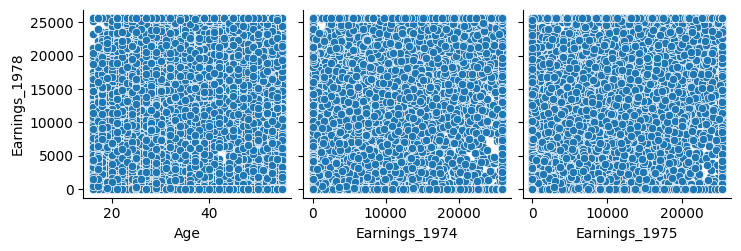

In [7]:
sns.pairplot(data, x_vars=['Age', 'Earnings_1974', 'Earnings_1975'], y_vars='Earnings_1978')
plt.show()


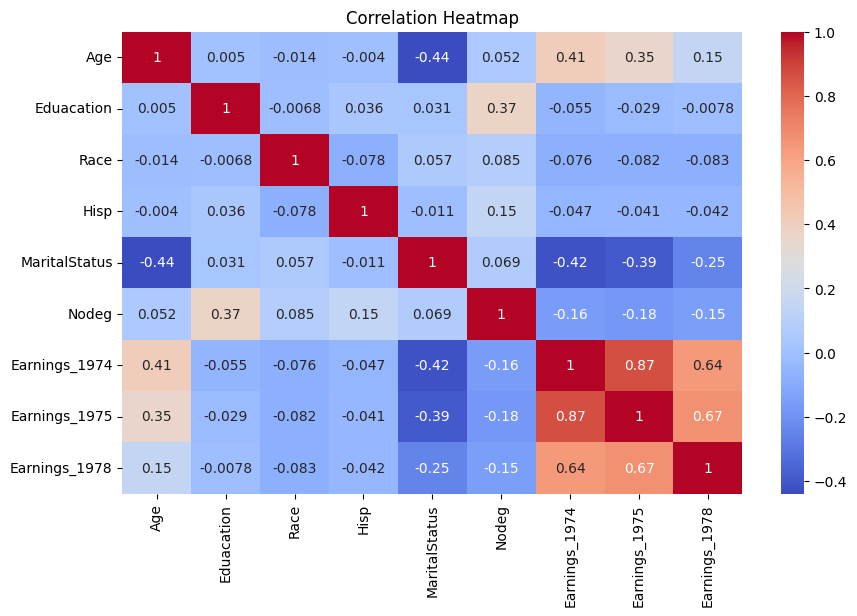

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_test)


In [12]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-1.08170718e+02  2.88143326e+02 -9.00114202e+02 -4.18328558e+02
 -1.17596218e+02 -6.61020666e+02  2.80529540e-01  4.80123912e-01]
Intercept: 7916.849129343898


In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 48763986.26759562
R-squared: 0.4669767668722279


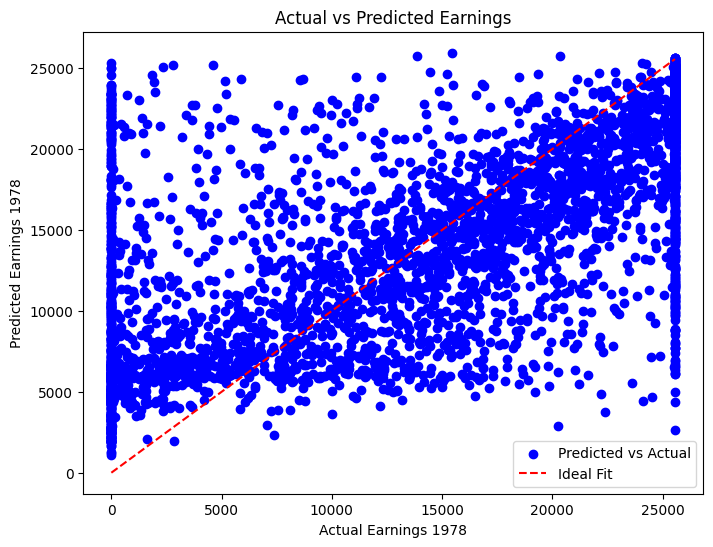

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Earnings 1978")
plt.ylabel("Predicted Earnings 1978")
plt.title("Actual vs Predicted Earnings")
plt.legend()
plt.show()


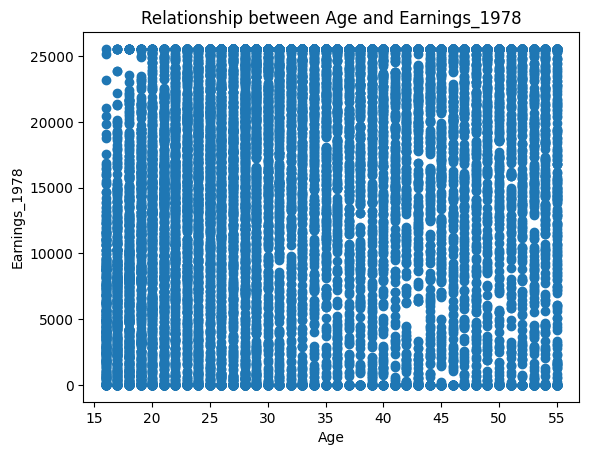

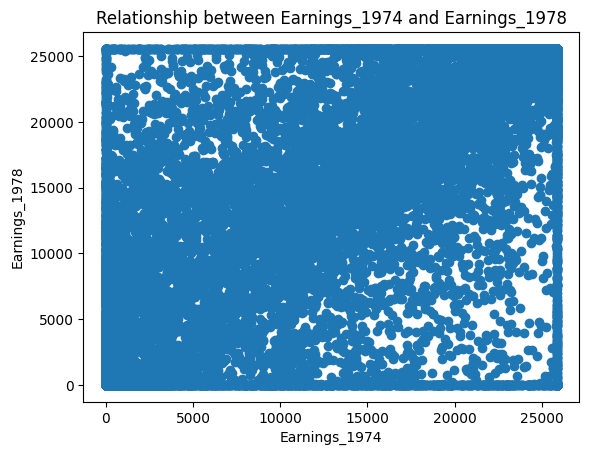

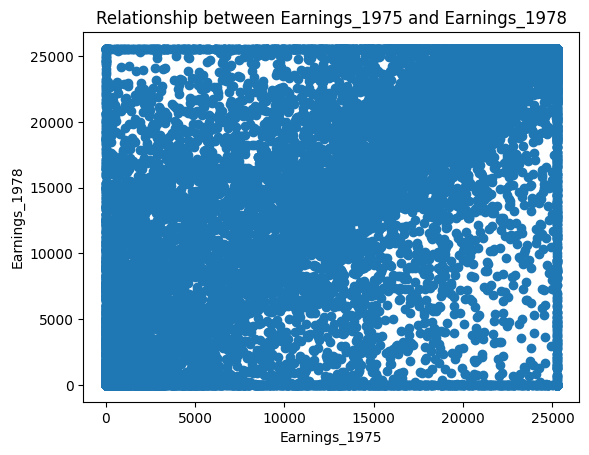

In [15]:
import matplotlib.pyplot as plt
for col in ['Age', 'Earnings_1974', 'Earnings_1975']:
    plt.scatter(data_encoded[col], data_encoded['Earnings_1978'])
    plt.title(f'Relationship between {col} and Earnings_1978')
    plt.xlabel(col)
    plt.ylabel('Earnings_1978')
    plt.show()


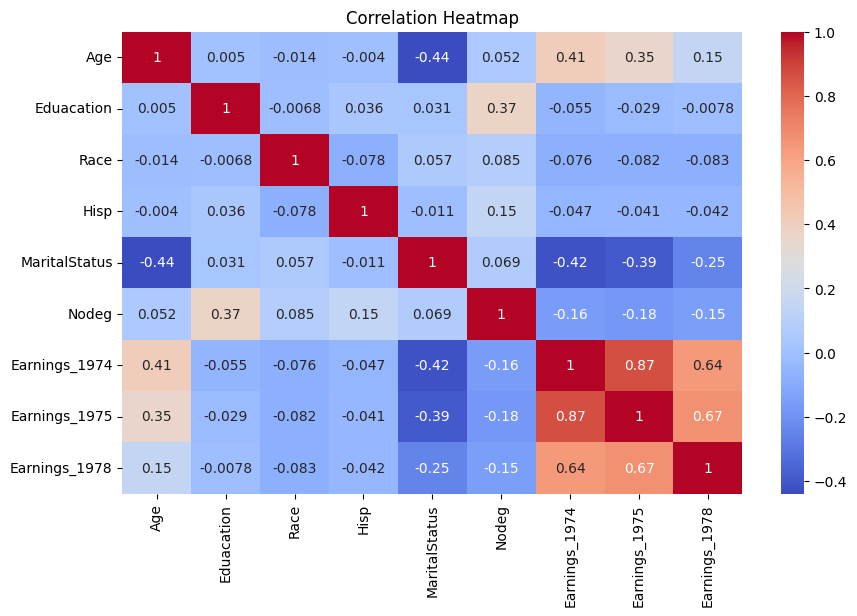

         feature        VIF
0            Age   5.580414
1     Eduacation   2.250858
2           Race   1.098690
3           Hisp   1.105450
4  MaritalStatus   1.294160
5          Nodeg   1.776641
6  Earnings_1974  13.845885
7  Earnings_1975  12.989897


In [17]:
import seaborn as sns
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


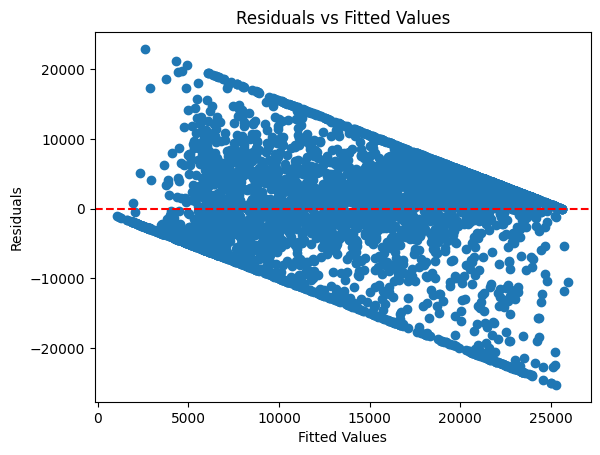

In [18]:
import numpy as np

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


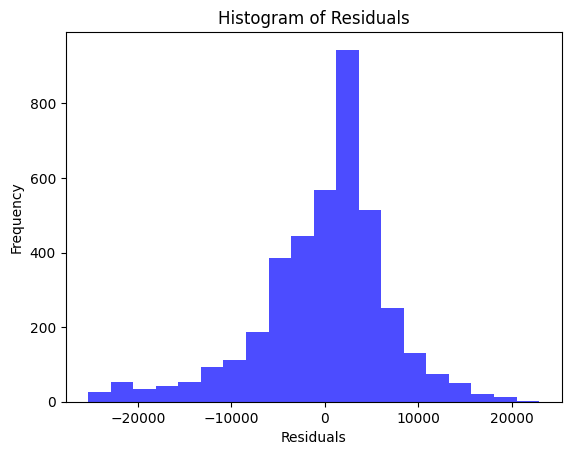

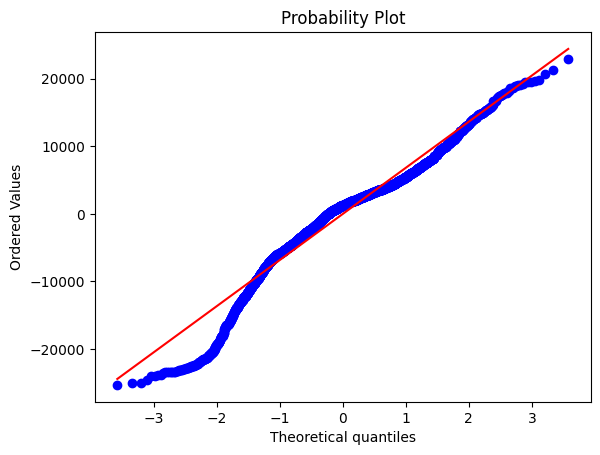

Shapiro-Wilk Test Statistic: 0.9525363078199038
p-value: 3.5534016715800775e-34
Residuals are not normally distributed.


In [19]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Histogram
plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

# Shapiro-Wilk Test
stat, p = stats.shapiro(residuals)
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p)
if p > 0.05:
    print("Residuals are normally distributed.")
else:
    print("Residuals are not normally distributed.")


In [20]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print('Durbin-Watson Statistic:', dw_stat)
if 1.5 < dw_stat < 2.5:
    print("Residuals are independent.")
else:
    print("Residuals show signs of autocorrelation.")


Durbin-Watson Statistic: 1.963563298228293
Residuals are independent.
